In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [7]:
df.shape

(5110, 12)

In [ ]:
print("First 10 rows:")
print(df.head(10))


First 10 rows:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2    

In [ ]:
print("\nLast 10 rows:")
print(df.tail(10))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


<Axes: >

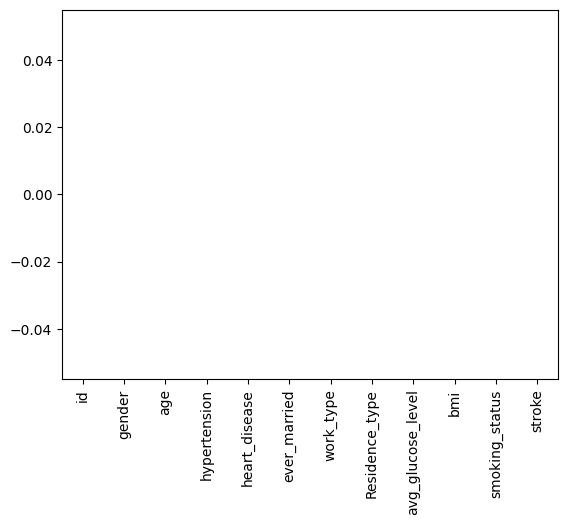

In [42]:

df.isna().sum().plot(kind="bar")


In [ ]:
# i think the best way to fill the missing values is to use the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)
#checking if these is still missing values
df.isnull().sum()


C:\Users\Masters\AppData\Local\Temp\ipykernel_8656\3377437669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:

stroke_percentage = df["stroke"].value_counts(normalize=True) * 100
print(stroke_percentage)


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [28]:

age_insights = df.groupby("stroke")["age"].mean()
print(age_insights)



stroke
0    41.971545
1    67.728193
Name: age, dtype: float64


In [37]:
marriage_impact = df.groupby("ever_married")["stroke"].mean() * 100
print(marriage_impact)


ever_married
No     1.650541
Yes    6.561288
Name: stroke, dtype: float64


In [38]:

smoking_impact = df.groupby("smoking_status")["stroke"].mean() * 100
print(smoking_impact)


smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64


In [8]:

stroke_by_gender = df.groupby("gender")["stroke"].sum()
print(stroke_by_gender)


gender
Female    141
Male      108
Other       0
Name: stroke, dtype: int64


In [32]:

hypertension_stroke = df[df["stroke"] == 1]["hypertension"].value_counts(normalize=True) * 100
print("Hypertension effect:\n", hypertension_stroke)


heart_disease_stroke = df[df["stroke"] == 1]["heart_disease"].value_counts(normalize=True) * 100
print("\nHeart disease effect:\n", heart_disease_stroke)


Hypertension effect:
 hypertension
0    73.493976
1    26.506024
Name: proportion, dtype: float64

Heart disease effect:
 heart_disease
0    81.124498
1    18.875502
Name: proportion, dtype: float64


In [33]:

work_impact = df.groupby("work_type")["stroke"].mean() * 100
print(work_impact)


work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64


In [34]:

residence_impact = df.groupby("Residence_type")["stroke"].mean() * 100
print(residence_impact)


Residence_type
Rural    4.534606
Urban    5.200308
Name: stroke, dtype: float64


In [35]:

glucose_bmi_impact = df.groupby("stroke")[["avg_glucose_level", "bmi"]].mean()
print(glucose_bmi_impact)


        avg_glucose_level        bmi
stroke                              
0              104.795513  28.799115
1              132.544739  30.090361
